1. Import Libraries

In [1]:
import pandas as pd # to read data into data frame
import numpy as np # to perform data manipulations
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import datetime
import calendar

2. Read CSV File

In [5]:
data = pd.read_csv('C:/Users/User/OneDrive - Arden University/Documents/Data Science Projects/Python Projects/In Progress/Uber Data Analysis/Uber_Drives.csv') #copy the entire file path 
data.head() # gives all the headings of the data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


3. Check for missing values using NaN (Not a Number)

In [7]:
data.isnull() # outputs 'True' when a data is missing and 'false' when there's a data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [8]:
data.isnull().any() #Highlights all the columns with null or incorrect values

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [9]:
data.isnull().sum() #Number of null in each column

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

4. Missing data will be deleted but we'll work on finding missing data for future works.

In [10]:
data = data.dropna() #drops NAN data rows

In [11]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

5. Use appropraite python data types

In [13]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [14]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y  %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y  %H:%M')

#formating dates to the proper data type.

In [15]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

6. Creating empty lists from the data and append data

In [16]:
hour = []
day = []
day_of_week = []
monthName = []
month = []
weekday = []

for x in data['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  day_of_week.append(x.day_of_week)
  month.append(x.month)
  monthName.append(calendar.month_name[month[-1]])
  weekday.append(calendar.day_name[day_of_week[-1]])

# Add this lists as columns on the data set
data['HOUR'] = hour
data['NUM_OF_DAYS'] = day
data['DAY_OF_WEEK'] = day_of_week
data['MONTH_NAME'] = monthName
data['WEEKDAY'] = weekday

In [17]:
data.head() #checking for added columns

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,NUM_OF_DAYS,DAY_OF_WEEK,MONTH_NAME,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,January,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,January,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,January,Wednesday


In [18]:
data['MONTH_NAME'].value_counts() #Checking data per month

MONTH_NAME
December    134
February     82
June         73
March        71
November     60
January      59
April        50
May          46
July         46
October      20
August       12
Name: count, dtype: int64

In [19]:
data['PURPOSE*'].value_counts() #Checking the purpose of trips.

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

<Axes: xlabel='WEEKDAY', ylabel='count'>

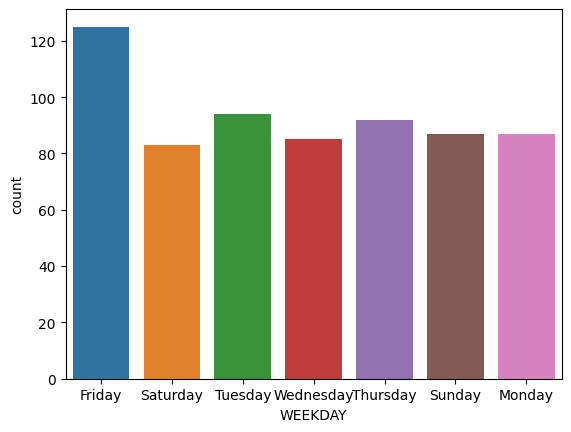

In [20]:
# Visual plot of the presented data

#sns.countplot(x='PURPOSE*' ,data = data)
#sns.countplot(x='CATEGORY*' ,data = data)
sns.countplot(x='WEEKDAY' ,data = data)

7. Check how long people travel with Uber

<Axes: ylabel='Frequency'>

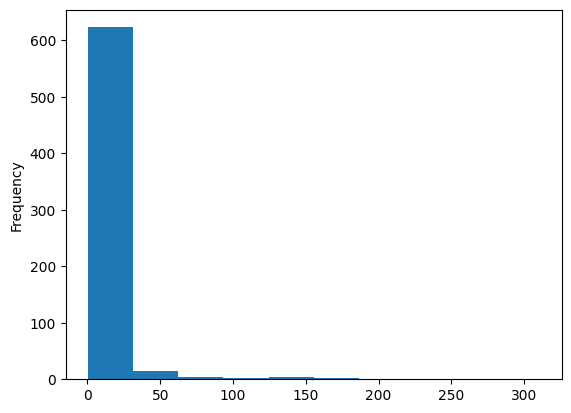

In [21]:
# The miles column of the dataset will be used to calculate and visual it.

data['MILES*'].plot.hist()

8. Most Booking Hours

Text(0.5, 1.0, 'Uber Trips vs Hours')

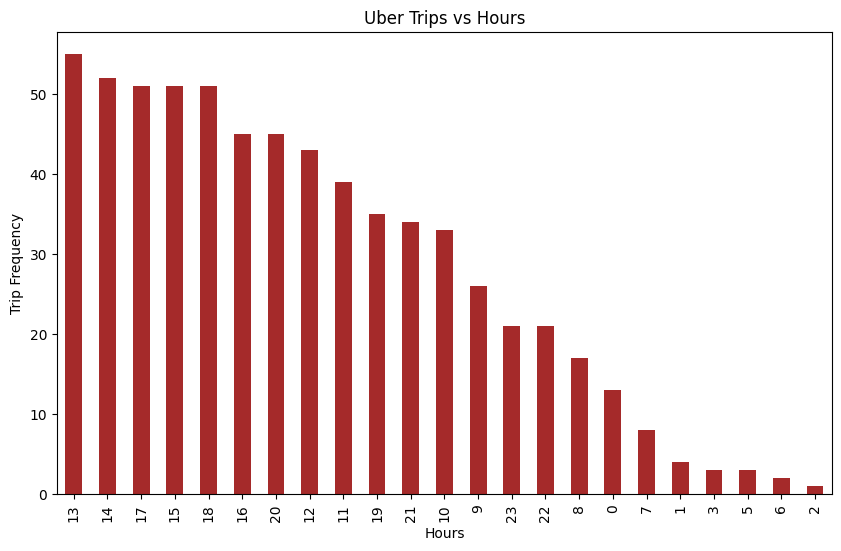

In [22]:
# Get the hours from the 'START_DATE' column
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar' , color = 'brown', figsize=(10,6))

plt.xlabel('Hours')
plt.ylabel('Trip Frequency')
plt.title('Uber Trips vs Hours')

9. Check Purpose of Trips

Text(0, 0.5, 'Frequency')

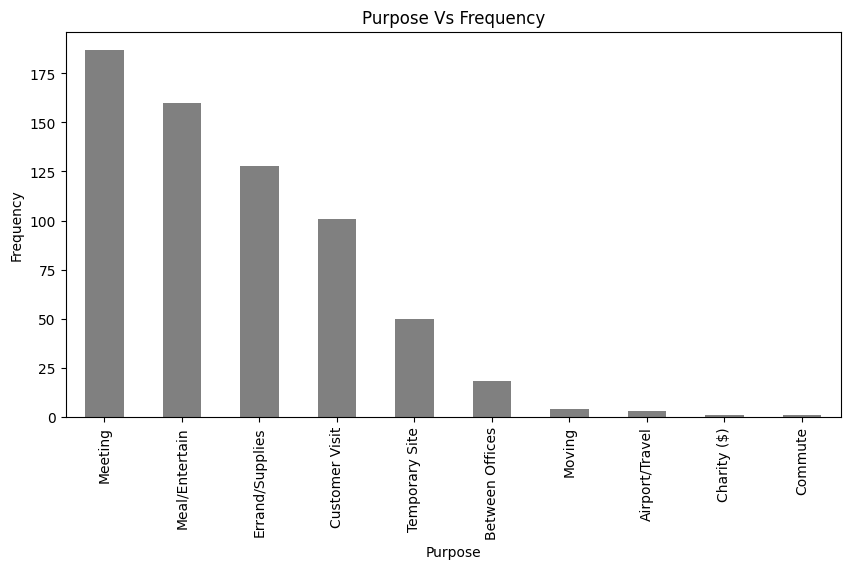

In [23]:
data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10,5), color='grey')
plt.title('Purpose Vs Frequency')
plt.xlabel('Purpose')
plt.ylabel('Frequency')

10. Identify Most Pick Up Locations

<Axes: xlabel='START*'>

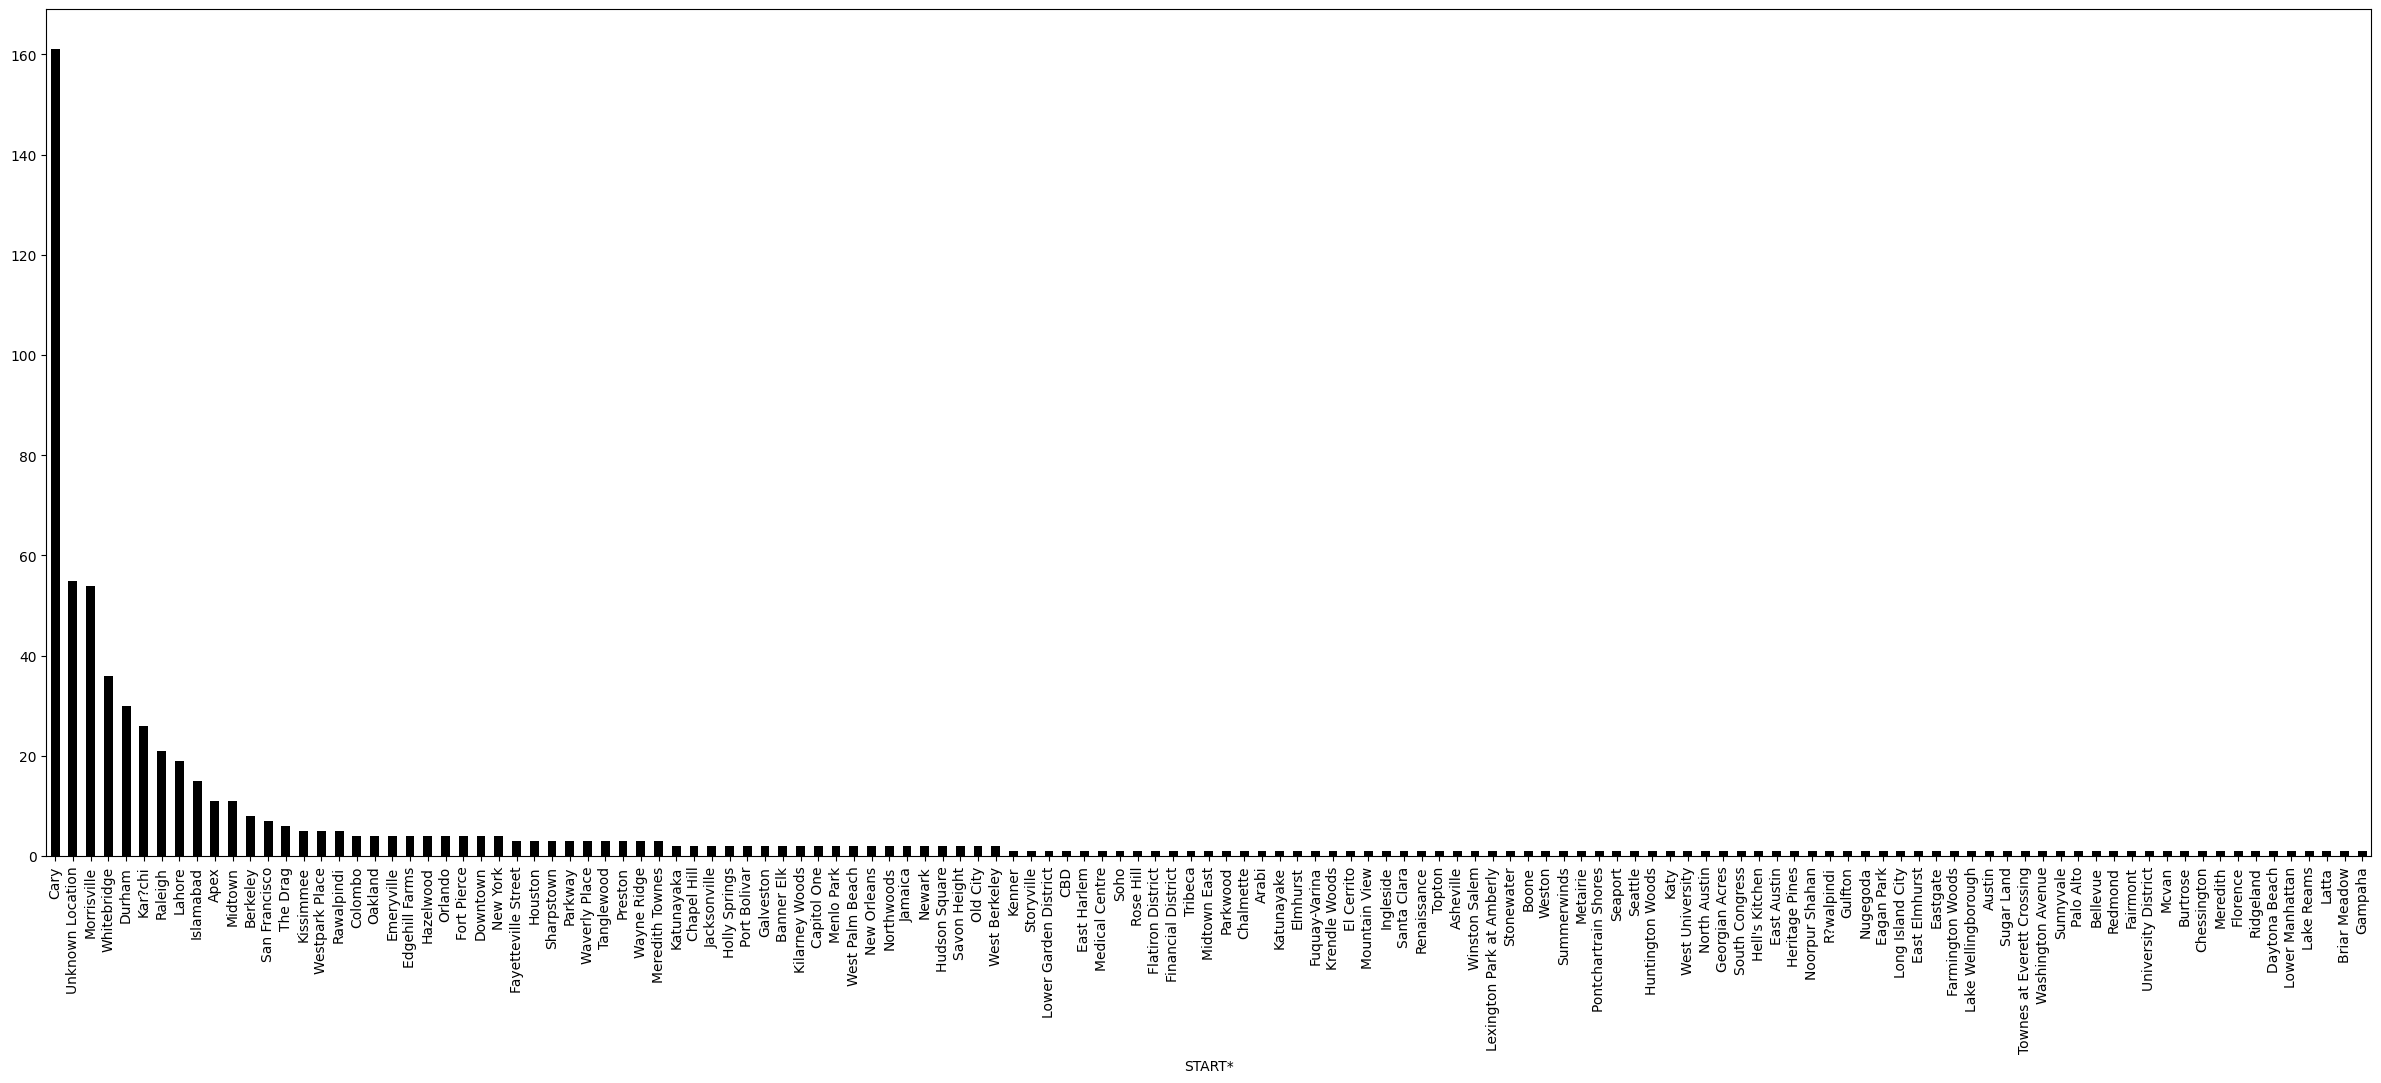

In [24]:
data['START*'].value_counts().plot(kind='bar', figsize=(30,11), color='black')

11. Days People book Uber more

Text(0.5, 1.0, 'Days Vs Frequency')

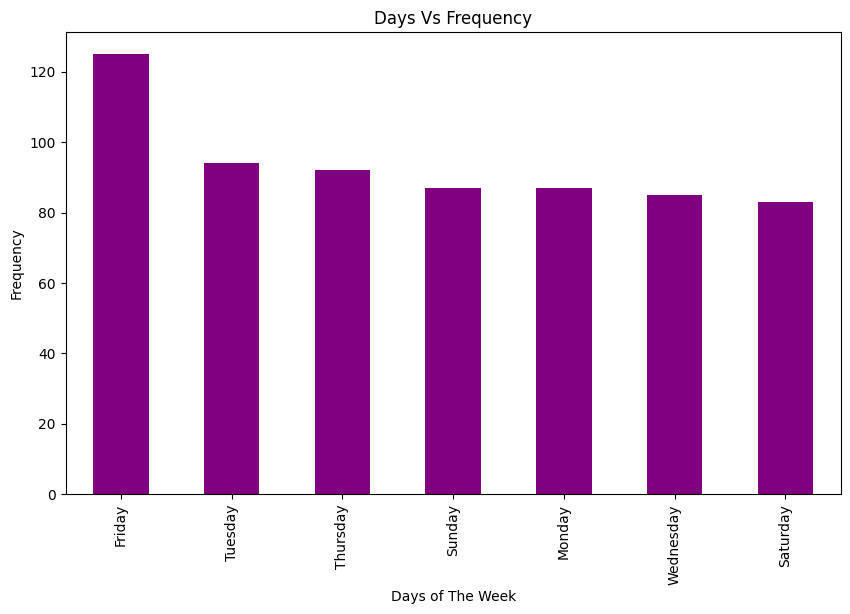

In [25]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,6), color='purple')

plt.xlabel('Days of The Week')
plt.ylabel('Frequency')
plt.title('Days Vs Frequency')

12. Number of trips per day

Text(0.5, 0, 'Days of The Month')

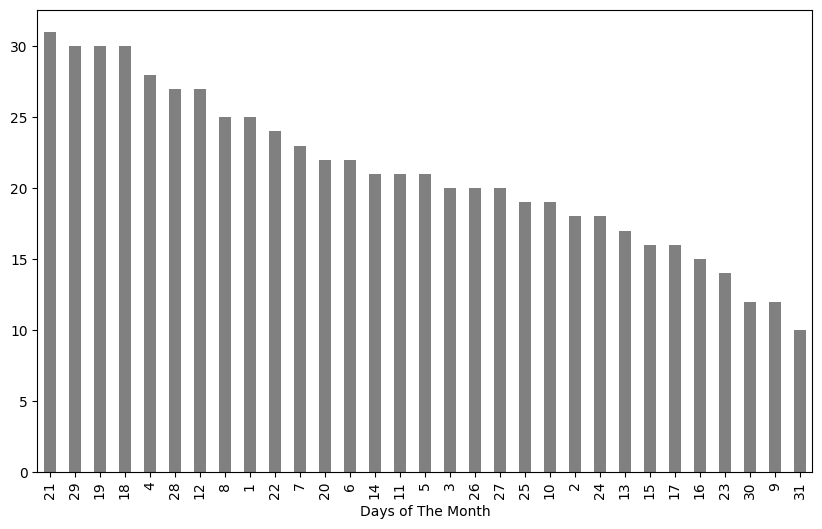

In [27]:
data['NUM_OF_DAYS'].value_counts().plot(kind='bar',figsize=(10,6), color='grey')
plt.xlabel('Days of The Month')

13. Number of Trips per Month

Text(0.5, 0, 'Month')

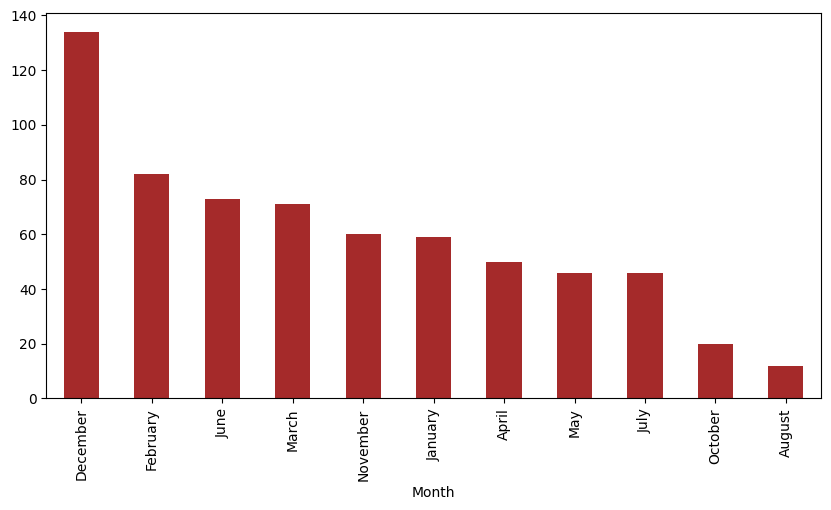

In [29]:
data['MONTH_NAME'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')
#data['MONTH_NAME'].value_counts()
plt.xlabel('Month')